In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [2]:
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import keras
import re
import os
from keras.models import load_model
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

time: 9.43 s (started: 2024-06-27 08:34:05 +00:00)


In [6]:
dataset_path_train= '/content/fraudTest.csv'

df_train = pd.read_csv(dataset_path_train)

df_train .head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


time: 4.38 s (started: 2024-06-27 08:35:22 +00:00)


In [7]:
df_train .isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

time: 324 ms (started: 2024-06-27 08:35:37 +00:00)


In [8]:
df_train .dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

time: 5.82 ms (started: 2024-06-27 08:35:44 +00:00)


<Axes: xlabel='is_fraud'>

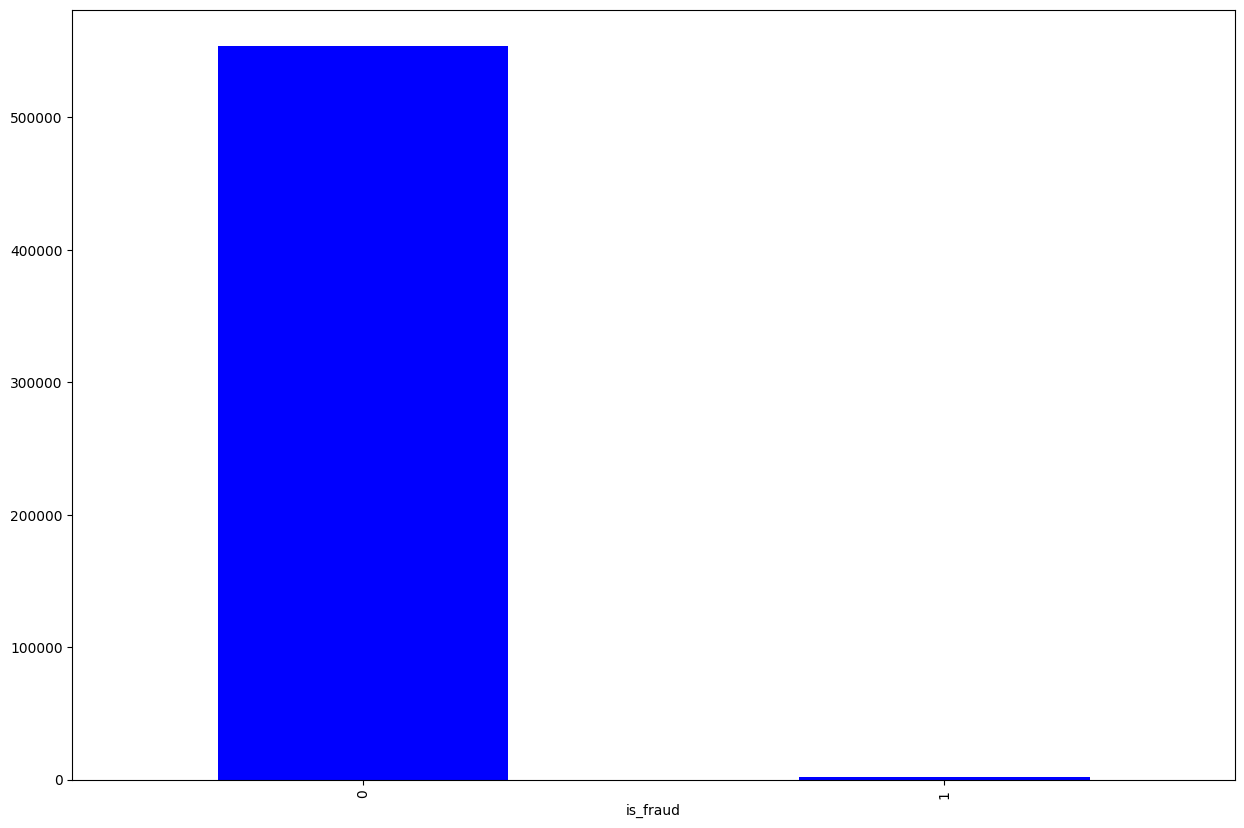

time: 306 ms (started: 2024-06-27 08:36:03 +00:00)


In [9]:
fraud_count = df_train ['is_fraud']
fraud_count.value_counts().plot(kind="bar",figsize=(15,10),color='blue')

In [10]:
df_train .drop(columns=['Unnamed: 0','merchant', 'cc_num','first', 'last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'], inplace= True)
df_train

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,Columbia,SC,33.9659,-80.9355,333497,1968-03-19,0
1,2020-06-21 12:14:33,personal_care,29.84,Altonah,UT,40.3207,-110.4360,302,1990-01-17,0
2,2020-06-21 12:14:53,health_fitness,41.28,Bellmore,NY,40.6729,-73.5365,34496,1970-10-21,0
3,2020-06-21 12:15:15,misc_pos,60.05,Titusville,FL,28.5697,-80.8191,54767,1987-07-25,0
4,2020-06-21 12:15:17,travel,3.19,Falmouth,MI,44.2529,-85.0170,1126,1955-07-06,0
...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,1966-02-13,0
555715,2020-12-31 23:59:09,kids_pets,111.84,Lake Jackson,TX,29.0393,-95.4401,28739,1999-12-27,0
555716,2020-12-31 23:59:15,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,1981-11-29,0
555717,2020-12-31 23:59:24,travel,7.99,Mesa,ID,44.6255,-116.4493,129,1965-12-15,0


time: 69.1 ms (started: 2024-06-27 08:36:12 +00:00)


In [14]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time']) # Use df_train instead of df
df_train['trans_date_trans_time'] = df_train['trans_date_trans_time'].apply(lambda x: x.timestamp())
df_train['dob'] = pd.to_datetime(df_train['dob'])
df_train['dob'] = df_train['dob'].apply(lambda x: x.timestamp())
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['category','city', 'state']
for col in columns_to_convert_in_string_to_int:
    df_train[col] = label_encoder.fit_transform(df_train[col])
columns_to_convert_in_int_to_float = ['category','city', 'state','city_pop']
for col in columns_to_convert_in_int_to_float:
    df_train[col] = df_train[col].astype('float64')

time: 8.88 s (started: 2024-06-27 08:38:06 +00:00)


In [15]:
df_train .dtypes

trans_date_trans_time    float64
category                 float64
amt                      float64
city                     float64
state                    float64
lat                      float64
long                     float64
city_pop                 float64
dob                      float64
is_fraud                   int64
dtype: object

time: 5.93 ms (started: 2024-06-27 08:38:34 +00:00)


In [16]:
X = df_train .drop(columns=['is_fraud'])
Y = df_train ['is_fraud']

time: 30.6 ms (started: 2024-06-27 08:38:57 +00:00)


In [17]:
X

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob
0,1.592742e+09,10.0,2.86,157.0,39.0,33.9659,-80.9355,333497.0,-56419200.0
1,1.592742e+09,10.0,29.84,16.0,43.0,40.3207,-110.4360,302.0,632534400.0
2,1.592742e+09,5.0,41.28,61.0,33.0,40.6729,-73.5365,34496.0,25315200.0
3,1.592742e+09,9.0,60.05,764.0,8.0,28.5697,-80.8191,54767.0,554169600.0
4,1.592742e+09,13.0,3.19,247.0,21.0,44.2529,-85.0170,1126.0,-457315200.0
...,...,...,...,...,...,...,...,...,...
555714,1.609459e+09,5.0,43.77,443.0,23.0,40.4931,-91.8912,519.0,-122515200.0
555715,1.609459e+09,7.0,111.84,401.0,42.0,29.0393,-95.4401,28739.0,946252800.0
555716,1.609459e+09,7.0,86.88,104.0,46.0,46.1966,-118.9017,3684.0,375840000.0
555717,1.609459e+09,13.0,7.99,476.0,12.0,44.6255,-116.4493,129.0,-127699200.0


time: 37 ms (started: 2024-06-27 08:40:29 +00:00)


In [18]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

time: 7.7 ms (started: 2024-06-27 08:40:38 +00:00)


In [19]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

time: 145 ms (started: 2024-06-27 08:40:49 +00:00)


In [20]:
X

array([[-1.70387057,  0.9616832 , -0.42446311, ...,  0.677451  ,
         0.81652054, -0.32414447],
       [-1.70386903,  0.9616832 , -0.25233729, ..., -1.47245426,
        -0.2926852 ,  0.92833581],
       [-1.70386518, -0.31615123, -0.17935288, ...,  1.21666725,
        -0.17885341, -0.17555576],
       ...,
       [ 1.5103518 ,  0.19498254,  0.11156401, ..., -2.08940832,
        -0.28142652,  0.46167931],
       [ 1.51035353,  1.72838387, -0.39173496, ..., -1.91068498,
        -0.29326111, -0.45372764],
       [ 1.51035546, -1.59398566, -0.19944911, ..., -0.52824645,
         0.09247663,  1.11823406]])

time: 4.67 ms (started: 2024-06-27 08:40:57 +00:00)


In [21]:
X_train, _ , Y_train, _ = train_test_split(X, Y, random_state=42)

time: 138 ms (started: 2024-06-27 08:41:12 +00:00)


In [23]:
dataset_path_test= '/content/fraudTest.csv'

df_test = pd.read_csv(dataset_path_test)

df_test .head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


time: 4.88 s (started: 2024-06-27 08:41:39 +00:00)


In [24]:
df_test .isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

time: 324 ms (started: 2024-06-27 08:42:28 +00:00)


In [25]:
df_test .dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

time: 5.55 ms (started: 2024-06-27 08:42:36 +00:00)


<Axes: xlabel='is_fraud'>

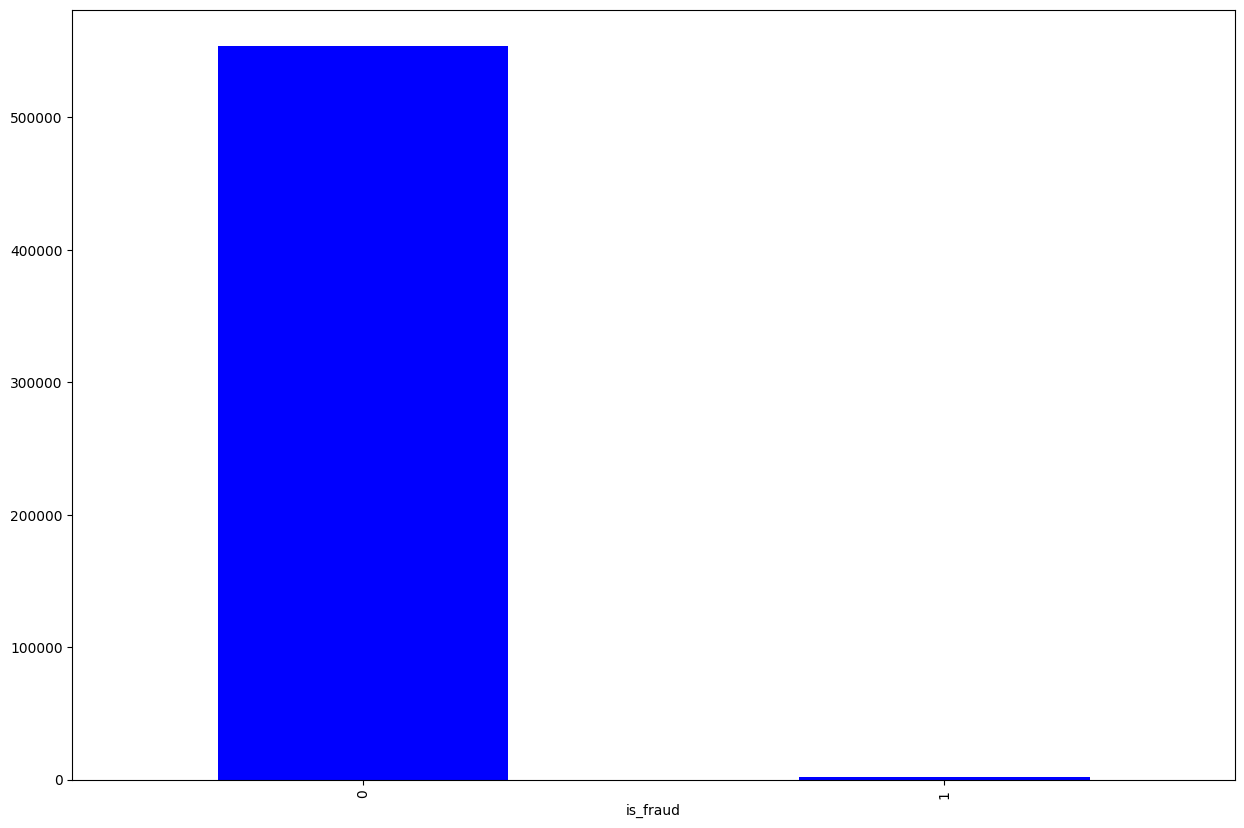

time: 249 ms (started: 2024-06-27 08:42:51 +00:00)


In [26]:
fraud_count = df_test ['is_fraud']
fraud_count.value_counts().plot(kind="bar",figsize=(15,10),color='blue')

In [27]:
df_test .drop(columns=['Unnamed: 0','merchant', 'cc_num','first', 'last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'], inplace= True)
df_test

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,Columbia,SC,33.9659,-80.9355,333497,1968-03-19,0
1,2020-06-21 12:14:33,personal_care,29.84,Altonah,UT,40.3207,-110.4360,302,1990-01-17,0
2,2020-06-21 12:14:53,health_fitness,41.28,Bellmore,NY,40.6729,-73.5365,34496,1970-10-21,0
3,2020-06-21 12:15:15,misc_pos,60.05,Titusville,FL,28.5697,-80.8191,54767,1987-07-25,0
4,2020-06-21 12:15:17,travel,3.19,Falmouth,MI,44.2529,-85.0170,1126,1955-07-06,0
...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,1966-02-13,0
555715,2020-12-31 23:59:09,kids_pets,111.84,Lake Jackson,TX,29.0393,-95.4401,28739,1999-12-27,0
555716,2020-12-31 23:59:15,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,1981-11-29,0
555717,2020-12-31 23:59:24,travel,7.99,Mesa,ID,44.6255,-116.4493,129,1965-12-15,0


time: 74.9 ms (started: 2024-06-27 08:42:58 +00:00)


In [28]:
df_test ['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test ['trans_date_trans_time'] = df_test ['trans_date_trans_time'].apply(lambda x: x.timestamp())
df_test ['dob'] = pd.to_datetime(df_test ['dob'])
df_test ['dob'] = df_test ['dob'].apply(lambda x: x.timestamp())

time: 5.28 s (started: 2024-06-27 08:43:08 +00:00)


In [29]:
label_encoder = LabelEncoder()
columns_to_convert = ['category','city', 'state']
for col in columns_to_convert:
    df_test [col] = label_encoder.fit_transform(df_test [col])

time: 316 ms (started: 2024-06-27 08:43:16 +00:00)


In [30]:
columns_to_convert = ['category','city', 'state','city_pop']
for col in columns_to_convert:
    df_test [col] = df_test [col].astype('float64')

time: 12.6 ms (started: 2024-06-27 08:43:24 +00:00)


In [31]:
df_test .dtypes

trans_date_trans_time    float64
category                 float64
amt                      float64
city                     float64
state                    float64
lat                      float64
long                     float64
city_pop                 float64
dob                      float64
is_fraud                   int64
dtype: object

time: 6.53 ms (started: 2024-06-27 08:43:32 +00:00)


In [32]:
X_test_initial = df_test .drop(columns=['is_fraud'])
Y_test_initial = df_test ['is_fraud']

time: 26.4 ms (started: 2024-06-27 08:43:39 +00:00)


In [33]:
X_test_initial

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob
0,1.592742e+09,10.0,2.86,157.0,39.0,33.9659,-80.9355,333497.0,-56419200.0
1,1.592742e+09,10.0,29.84,16.0,43.0,40.3207,-110.4360,302.0,632534400.0
2,1.592742e+09,5.0,41.28,61.0,33.0,40.6729,-73.5365,34496.0,25315200.0
3,1.592742e+09,9.0,60.05,764.0,8.0,28.5697,-80.8191,54767.0,554169600.0
4,1.592742e+09,13.0,3.19,247.0,21.0,44.2529,-85.0170,1126.0,-457315200.0
...,...,...,...,...,...,...,...,...,...
555714,1.609459e+09,5.0,43.77,443.0,23.0,40.4931,-91.8912,519.0,-122515200.0
555715,1.609459e+09,7.0,111.84,401.0,42.0,29.0393,-95.4401,28739.0,946252800.0
555716,1.609459e+09,7.0,86.88,104.0,46.0,46.1966,-118.9017,3684.0,375840000.0
555717,1.609459e+09,13.0,7.99,476.0,12.0,44.6255,-116.4493,129.0,-127699200.0


time: 41.4 ms (started: 2024-06-27 08:43:45 +00:00)


In [34]:
Y_test_initial

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

time: 5.92 ms (started: 2024-06-27 08:43:51 +00:00)


In [35]:
scaler = StandardScaler()
X_test_initial= scaler.fit_transform(X_test_initial)

time: 85.3 ms (started: 2024-06-27 08:43:58 +00:00)


In [36]:
X_test_initial

array([[-1.70387057,  0.9616832 , -0.42446311, ...,  0.677451  ,
         0.81652054, -0.32414447],
       [-1.70386903,  0.9616832 , -0.25233729, ..., -1.47245426,
        -0.2926852 ,  0.92833581],
       [-1.70386518, -0.31615123, -0.17935288, ...,  1.21666725,
        -0.17885341, -0.17555576],
       ...,
       [ 1.5103518 ,  0.19498254,  0.11156401, ..., -2.08940832,
        -0.28142652,  0.46167931],
       [ 1.51035353,  1.72838387, -0.39173496, ..., -1.91068498,
        -0.29326111, -0.45372764],
       [ 1.51035546, -1.59398566, -0.19944911, ..., -0.52824645,
         0.09247663,  1.11823406]])

time: 4.45 ms (started: 2024-06-27 08:44:04 +00:00)


In [37]:
X_test, _ , Y_test, _ = train_test_split(X_test_initial, Y_test_initial, random_state=42)

time: 135 ms (started: 2024-06-27 08:44:14 +00:00)


In [38]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((416789, 9), (416789, 9), (416789,), (416789,))

time: 3.98 ms (started: 2024-06-27 08:44:21 +00:00)


In [39]:
model = Sequential([
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

time: 51.9 ms (started: 2024-06-27 08:44:29 +00:00)


In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

time: 23.9 ms (started: 2024-06-27 08:44:36 +00:00)


In [41]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=1024, validation_split=0.2)

Epoch 1/15
326/326 [==============================] - 7s 15ms/step - loss: 0.0323 - accuracy: 0.9960 - val_loss: 0.0154 - val_accuracy: 0.9965
Epoch 2/15
326/326 [==============================] - 3s 11ms/step - loss: 0.0161 - accuracy: 0.9960 - val_loss: 0.0135 - val_accuracy: 0.9965
Epoch 3/15
326/326 [==============================] - 4s 11ms/step - loss: 0.0147 - accuracy: 0.9961 - val_loss: 0.0125 - val_accuracy: 0.9965
Epoch 4/15
326/326 [==============================] - 6s 18ms/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.0118 - val_accuracy: 0.9967
Epoch 5/15
326/326 [==============================] - 3s 11ms/step - loss: 0.0129 - accuracy: 0.9967 - val_loss: 0.0109 - val_accuracy: 0.9970
Epoch 6/15
326/326 [==============================] - 4s 11ms/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0111 - val_accuracy: 0.9971
Epoch 7/15
326/326 [==============================] - 4s 13ms/step - loss: 0.0118 - accuracy: 0.9970 - val_loss: 0.0105 - val_accuracy: 0.9971

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

time: 2.01 s (started: 2024-06-27 08:46:15 +00:00)


In [43]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

time: 3.49 s (started: 2024-06-27 08:46:30 +00:00)


In [44]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

time: 2min 8s (started: 2024-06-27 08:46:41 +00:00)


In [45]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'\n Accuracy: {accuracy}')
y_pred_tf = (model.predict(X_test) > 0.5).astype("int32")

13025/13025 [==============================] - 24s 2ms/step - loss: 0.0090 - accuracy: 0.9975

 Accuracy: 0.9975335001945496
13025/13025 [==============================] - 28s 2ms/step
time: 1min 5s (started: 2024-06-27 08:48:57 +00:00)


In [46]:
y_pred_log_reg = log_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log_reg)}")
print(classification_report(Y_test, y_pred_log_reg))

Accuracy: 0.9958324236004309
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    415173
           1       0.00      0.00      0.00      1616

    accuracy                           1.00    416789
   macro avg       0.50      0.50      0.50    416789
weighted avg       0.99      1.00      0.99    416789

time: 1.14 s (started: 2024-06-27 08:50:06 +00:00)


In [47]:
y_pred_tree = decision_tree.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_tree)}")
print(classification_report(Y_test, y_pred_tree))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    415173
           1       1.00      1.00      1.00      1616

    accuracy                           1.00    416789
   macro avg       1.00      1.00      1.00    416789
weighted avg       1.00      1.00      1.00    416789

time: 866 ms (started: 2024-06-27 08:50:20 +00:00)


In [48]:
y_pred_forest = random_forest.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_forest)}")
print(classification_report(Y_test, y_pred_forest))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    415173
           1       1.00      1.00      1.00      1616

    accuracy                           1.00    416789
   macro avg       1.00      1.00      1.00    416789
weighted avg       1.00      1.00      1.00    416789

time: 8.33 s (started: 2024-06-27 08:50:33 +00:00)


In [49]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('True vs Predicted matrix')
    plt.show()

time: 3.75 ms (started: 2024-06-27 08:50:45 +00:00)


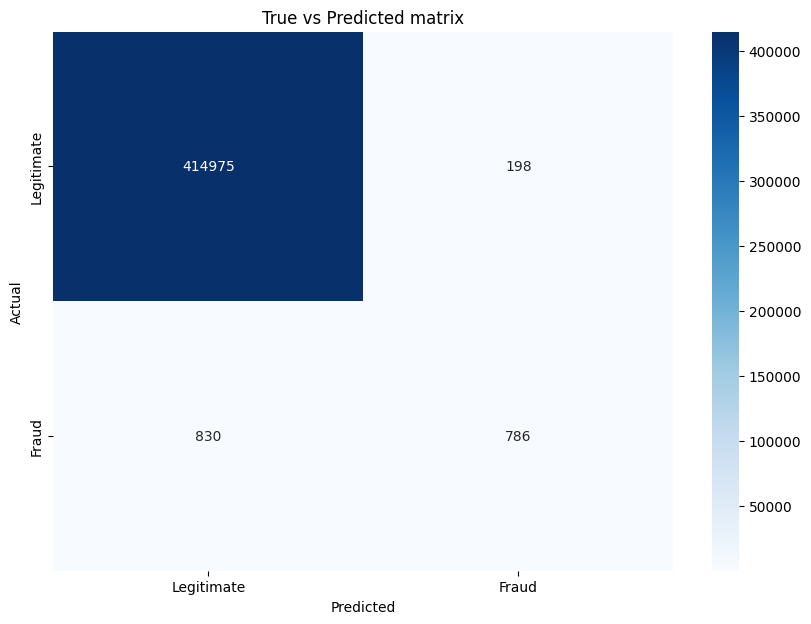

time: 551 ms (started: 2024-06-27 08:50:55 +00:00)


In [50]:
plot_confusion_matrix(Y_test, y_pred_tf)

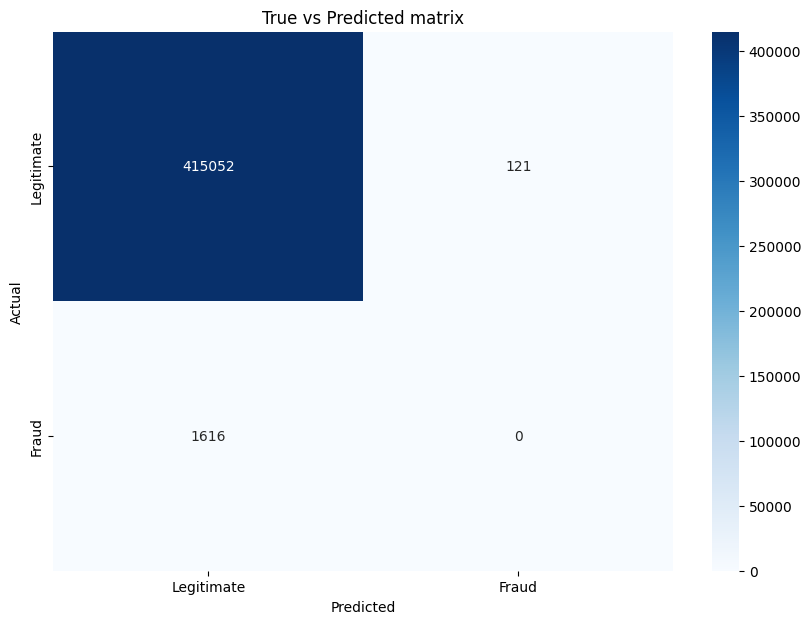

time: 1.15 s (started: 2024-06-27 08:51:03 +00:00)


In [51]:
plot_confusion_matrix(Y_test, y_pred_log_reg)

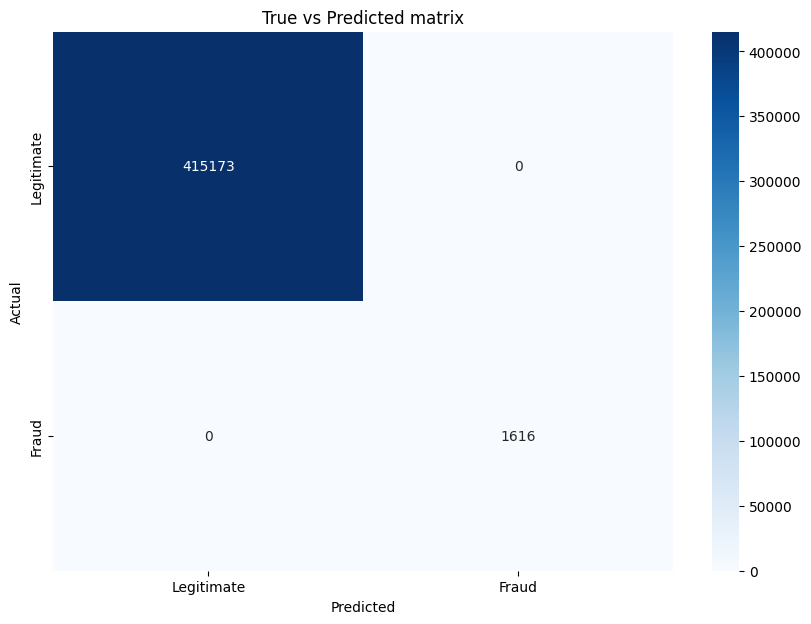

time: 593 ms (started: 2024-06-27 08:51:10 +00:00)


In [52]:
plot_confusion_matrix(Y_test, y_pred_tree)

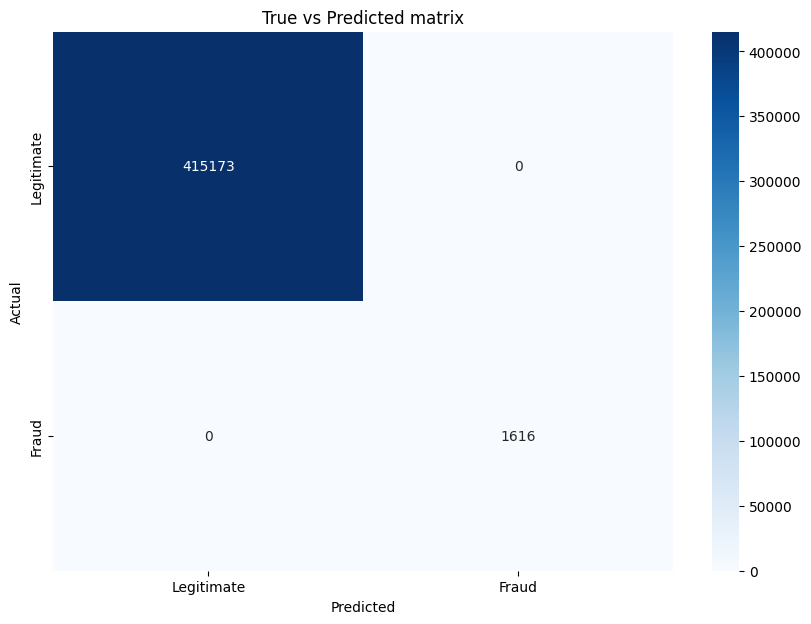

time: 549 ms (started: 2024-06-27 08:51:17 +00:00)


In [53]:
plot_confusion_matrix(Y_test, y_pred_forest)